## Importing Required Libraires

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

### General Checks 
1. **Load**: Load each dataset into the analysis environment.
2. **Datatype**: Verify and ensure correct data types for all columns.
3. **Null Values**: Check for any missing values and handle them appropriately.

In [2]:
# Load the Iris dataset
iris_data = load_iris()

In [3]:
# Creating a DataFrame from the dataset for easier manipulation
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.shape

(150, 5)

In [6]:
#Checking dattypes
iris.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

In [7]:
#Sum of Null_values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [9]:
#count of each species
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
iris['species'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

## Checking for Relationships (Linear or Non-Linear)
- From the correlation plot, we can observe strong linear relationships between petal length, petal width, and sepal length. However, the relationships involving sepal width are weaker. Therefore, we can conclude that the dataset exhibits strong linear relationships among certain features, while some features have weaker or less clear linear associations.

In [11]:
iris.drop(['species'],axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

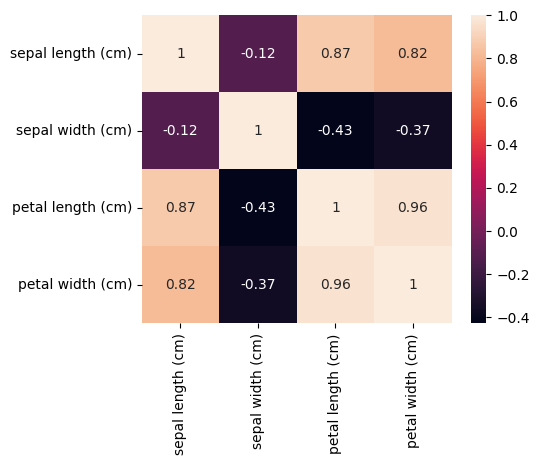

In [12]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(iris.drop(['species'],axis=1).corr(),annot=True,ax=ax)

### Converting Categorical Data to Numerical Format
- We use label encoding for the species column because it converts categorical variables into numerical format. This technique is important for machine learning, as many algorithms require numerical input to function properly. Most machine learning models can only process numerical data, so label encoding helps make the data compatible with these algorithms.

In [13]:
label_encoder = preprocessing.LabelEncoder()
iris['species']= label_encoder.fit_transform(iris['species']) 
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preparing Data for Splitting: Features and Target
#### Before splitting the data into training and testing sets, we first need to separate it into features and the target variable.
1. **Features**:These are the input variables used to make predictions. In this dataset, the features include sepal length, sepal width, petal length, and petal width.
2. **Target**: This is the output variable that we aim to predict. For this dataset, the target variable is the species of the Iris flowers.

In [14]:
x=iris.iloc[:,0:4] #Features
y=iris['species'] #Targets

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## Model
#### Choosing Between Logistic Regression and Decision Tree for Classification
- Even though we can use logistic regression for this classification problem (since it involves three classes: 0, 1, and 2), we would need to use multinomial logistic regression, which requires more tuning and considerations. We are opting for a decision tree because it can capture complex, non-linear relationships between the features and the target variable. If the relationship between the features and the species of Iris is non-linear, a decision tree might model this more effectively than logistic regression. That's why we are choosing a decision tree rather than logistic regression.

In [16]:
# Create and configure the decision tree model
model = DecisionTreeClassifier() 

# Fit the model using the training data
model.fit(x_train,y_train) 

# Evaluate the model and print the accuracy on the test data
print("Accuracy:", model.score(x_test,y_test) )

Accuracy: 1.0


In [17]:
# saving the model
pickle.dump(model,open('DT_iris.pkl','wb'))

In [18]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
Name: count, dtype: int64